In [94]:
#Importing the required modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#Reading the data file

data = pd.read_csv('takehome_user_engagement.csv')

In [3]:
data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
#Converting time_stamp column to type: datetime

data['time_stamp'] = pd.to_datetime(data['time_stamp'])

data['time_stamp']  = data['time_stamp'].dt.date

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
#Index of the dataframe is now of type date_time

data = data.set_index('time_stamp')

In [8]:
data.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [9]:
data = data.sort_index()

In [10]:
data.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [11]:
#Sorting the index in ascending order by time.

data = data.sort_index()

In [12]:
data.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


Next, we want to find out how many times a user logged on within a rolling 7 day period.

In [13]:
resampled_data = data.groupby('user_id')['visited'].rolling('7d').count()

In [14]:
resampled_data.head()

user_id  time_stamp         
1        2014-04-22 03:53:30    1.0
2        2013-11-15 03:45:04    1.0
         2013-11-29 03:45:04    1.0
         2013-12-09 03:45:04    1.0
         2013-12-25 03:45:04    1.0
Name: visited, dtype: float64

Next, we reset the index

In [15]:
resampled_data = resampled_data.reset_index()

In [16]:
resampled_data.head()

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0


We are only interested in those users who have had 3 or more logins at any point within a 1 week window

In [17]:
new_data = resampled_data.loc[resampled_data.visited >= 3]

In [18]:
new_data.head()

,user_id,time_stamp,visited
9,2,2014-02-09 03:45:04,3.0
10,2,2014-02-13 03:45:04,3.0
27,10,2013-02-19 22:08:03,3.0
30,10,2013-03-02 22:08:03,3.0
31,10,2013-03-05 22:08:03,3.0


In [19]:
#Resetting the index

new = new_data.reset_index()

In [20]:
all_users = new[['user_id']]

In [21]:
#Dropping dupplicates

all_users = all_users.drop_duplicates()

In [22]:
all_users.head()

,user_id
0,2
2,10
257,20
258,33
259,42


In [23]:
#Next, we make a column that identifies if a user is an active product user or now.

all_users['Product_users'] = 1.0

In [24]:
all_users.head()

,user_id,Product_users
0,2,1.0
2,10,1.0
257,20,1.0
258,33,1.0
259,42,1.0


In [25]:
#Next, we read the file that contains information about the user and the various attributes.

data1 = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [26]:
#Dropping columns that are not necessary for analysis

data1 = data1.drop(['name', 'email'], axis = 1)

In [27]:
data1.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [28]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


Next, we perform a left outer join with the user information table as the left table and the resampled/modified user engagement table as the right table.

In [29]:
final_df = data1.merge(all_users, left_on = 'object_id', right_on = 'user_id', how = 'left')

In [30]:
final_df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,Product_users
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN


The 'object_id' and 'user_id' columns contain the exact same information and hence, we only need one of them for our analysis.

In [31]:
final_df = final_df.drop('user_id', axis = 1)

In [32]:
final_df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Product_users
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


We fill NaN values of the product users column with 0s for those that aren't active users.

In [33]:
final_df['Product_users'] = final_df['Product_users'].fillna(0.0)

In [34]:
final_df.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Product_users
0,1,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [50]:
final_df['invited_by_user_id'].unique()

array([10803.,   316.,  1525., ...,  5093., 11854.,  5450.])

Let us now compute the overall fraction of the positive class i.e users who are active product users and have logged on 3 or more times within a 1 week window.

In [35]:
round(final_df['Product_users'].sum() / len(final_df), 2)

0.13

The positive class is roughly 13%

Next, let us identify the different type of creation source(s).

In [36]:
final_df['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

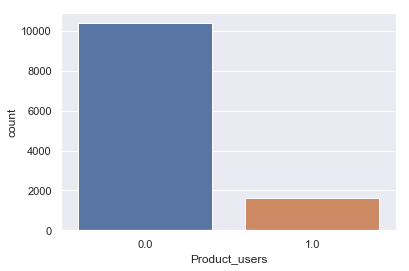

In [37]:
sns.countplot(final_df['Product_users'])

Next, let us users by their creation_sources.

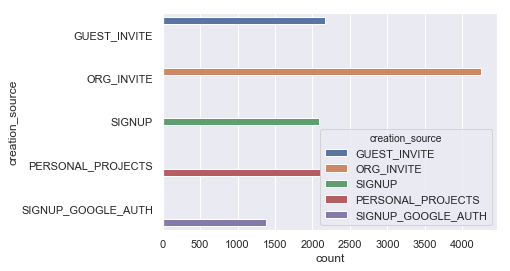

In [38]:
sns.countplot(y="creation_source", hue="creation_source", data=final_df)

In [45]:
creation_sources_list = final_df['creation_source'].unique()

In [70]:
creation_sources_dict = {}

In [71]:
for i in creation_sources_list:
    users_data = final_df.loc[final_df.creation_source == i]
    users_pct = round(users_data['Product_users'].sum() / len(users_data), 2)
    creation_sources_dict[i] = users_pct

In [72]:
creation_sources_dict

{'GUEST_INVITE': 0.17,
 'ORG_INVITE': 0.13,
 'SIGNUP': 0.14,
 'PERSONAL_PROJECTS': 0.08,
 'SIGNUP_GOOGLE_AUTH': 0.17}

In [107]:
creation_sources_df = pd.DataFrame.from_dict(creation_sources_dict, orient='index')

In [108]:
creation_sources_df = creation_sources_df.reset_index()

In [109]:
creation_sources_df.columns = ['Creation_source','Fraction of positive class']

In [110]:
creation_sources_df

,Creation_source,Fraction of positive class
0,GUEST_INVITE,0.17
1,ORG_INVITE,0.13
2,SIGNUP,0.14
3,PERSONAL_PROJECTS,0.08
4,SIGNUP_GOOGLE_AUTH,0.17


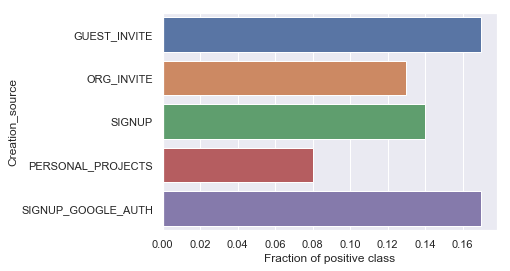

In [111]:
sns.barplot(y = 'Creation_source', x = 'Fraction of positive class', data = creation_sources_df)

We observe that a majority of the users signed up through organizational invites.

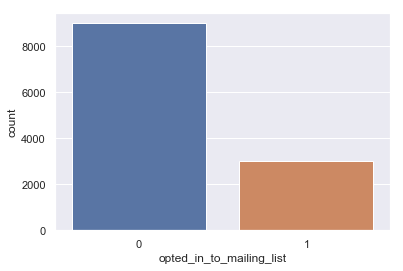

In [39]:
sns.countplot(final_df['opted_in_to_mailing_list'])

In [112]:
final_df['opted_in_to_mailing_list'].sum() / len(final_df)

0.2495

In [51]:
mail_list = final_df['opted_in_to_mailing_list'].unique()

In [53]:
mail_list

array([1, 0], dtype=int64)

In [54]:
for i in mail_list:
    users_data = final_df.loc[final_df.opted_in_to_mailing_list == i]
    users_pct = round(users_data['Product_users'].sum() / len(users_data), 2)
    print('Fraction of positive class users through ' + str(i) + ' is ' + str(users_pct))

Fraction of positive class users through 1 is 0.14
Fraction of positive class users through 0 is 0.13


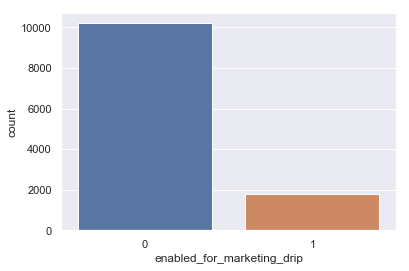

In [40]:
sns.countplot(final_df['enabled_for_marketing_drip'])

In [113]:
final_df['enabled_for_marketing_drip'].sum() / len(final_df)

0.14933333333333335

In [56]:
marketing_list = final_df['enabled_for_marketing_drip'].unique()

In [57]:
for i in mail_list:
    users_data = final_df.loc[final_df.opted_in_to_mailing_list == i]
    users_pct = round(users_data['enabled_for_marketing_drip'].sum() / len(users_data), 2)
    print('Fraction of positive class users through ' + str(i) + ' is ' + str(users_pct))

Fraction of positive class users through 1 is 0.45
Fraction of positive class users through 0 is 0.05


In [122]:
org_id_list = final_df['org_id'].unique()

In [123]:
org_id_dict = {}

In [124]:
for i in org_id_list:
    users_data = final_df.loc[final_df.org_id == i]
    users_pct = round(users_data['Product_users'].sum() / len(users_data), 2)
    org_id_dict[i] = users_pct

In [125]:
len(org_id_dict)

417

In [126]:
org_id_df = pd.DataFrame.from_dict(org_id_dict, orient='index')

In [129]:
org_id_df = org_id_df.reset_index()

In [130]:
org_id_df.columns = ['Org_id', 'Pos_class_frac']

In [131]:
org_id_df.head()

,Org_id,Pos_class_frac
0,11,0.11
1,1,0.06
2,94,0.19
3,193,0.25
4,197,0.14


In [135]:
org_id_df.sort_values('Pos_class_frac', ascending = False).head(25)

,Org_id,Pos_class_frac
376,387,0.58
36,235,0.46
336,270,0.43
290,399,0.38
401,392,0.38
380,400,0.38
135,415,0.38
270,117,0.36
313,345,0.36
239,289,0.35
